# CUSTOMER CHURN PREDICTION

#   ===================================================

#### WHAT IS CUSTOMER CHURN PREDICTION ?

Customer churn prediction involves using data and analytics to forecast which customers are likely to stop using a product or service. By analyzing historical customer behavior and other relevant data, businesses can identify patterns and indicators that may signal a customer's intention to leave. This prediction enables proactive measures to retain customers through targeted interventions, such as personalized offers or improved customer support.

#### IMPORT PAKAGES

In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### LOAD THE DATSET

In [172]:
df=pd.read_csv("F:/CODE SOFT/Customer Churn Prediction/Churn_Modelling.csv")

In [173]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [174]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [175]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [176]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
655,656,15692926,Toscani,498,Germany,Male,25,8,121702.73,1,1,1,132210.49,0
1240,1241,15617934,Septimus,579,France,Male,36,9,129829.59,1,1,1,60906.12,0
333,334,15728669,Knowles,584,Germany,Female,30,8,112013.81,1,1,0,177772.03,1
5079,5080,15692406,Gow,427,France,Male,37,5,0.00,2,1,1,121485.10,0
1170,1171,15590820,Ecuyer,699,Spain,Male,26,6,79932.41,1,0,0,150242.44,0
3273,3274,15646091,Frankland,560,Spain,Female,43,4,95140.44,2,1,0,123181.44,1
2342,2343,15788535,Tan,593,Spain,Male,44,5,0.00,1,1,0,128046.98,0
5115,5116,15727317,Brady,533,Germany,Female,49,1,102286.60,3,1,0,69409.37,1
6598,6599,15677141,Turnbull,586,Spain,Male,29,2,132450.24,1,1,1,36176.63,0
7199,7200,15705343,May,649,Spain,Female,32,7,0.00,1,1,0,28797.32,0


In [177]:
df.shape

(10000, 14)

In [178]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [180]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [181]:
df.duplicated().sum()

0

In [182]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

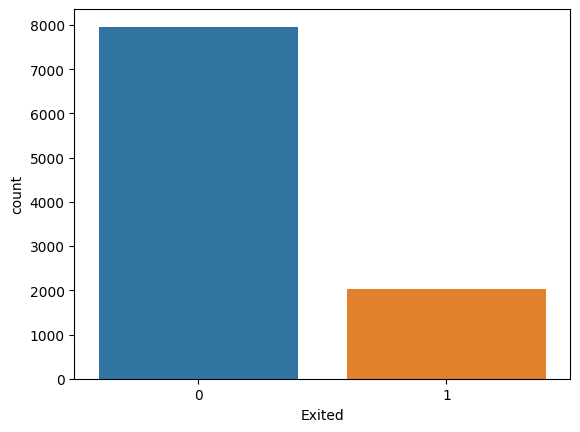

In [183]:
sns.countplot(df,x='Exited')

<Axes: xlabel='Gender', ylabel='count'>

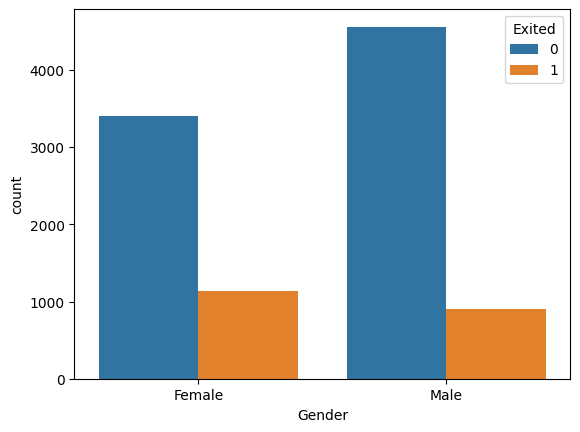

In [184]:
sns.countplot(df,x='Gender',hue='Exited')

<Axes: xlabel='Geography', ylabel='count'>

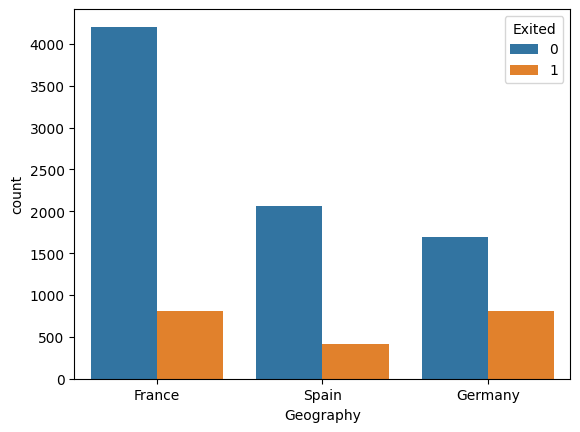

In [185]:
sns.countplot(df,x='Geography',hue="Exited")

<Axes: xlabel='NumOfProducts', ylabel='Count'>

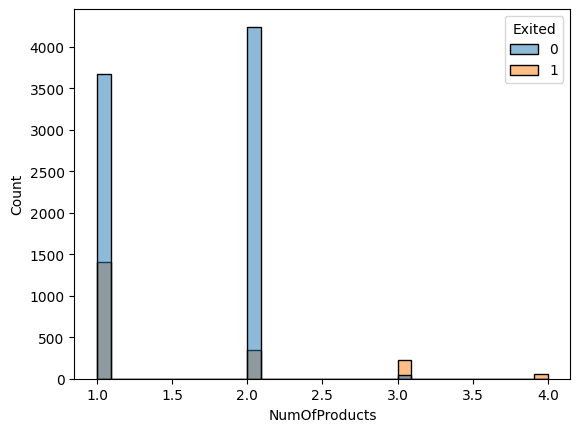

In [186]:
      sns.histplot(df,x='NumOfProducts',hue="Exited")

<Axes: xlabel='HasCrCard', ylabel='count'>

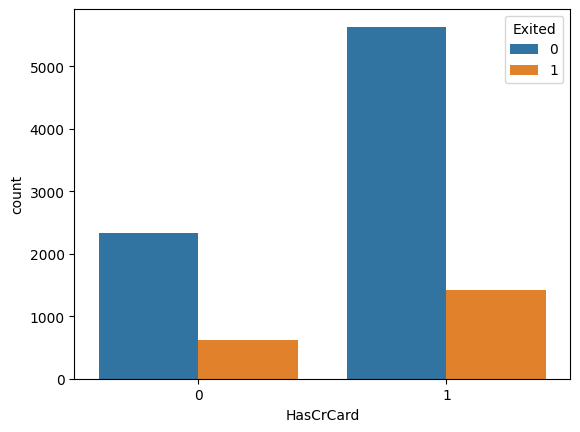

In [187]:
sns.countplot(df,x="HasCrCard",hue="Exited")

<Axes: xlabel='Tenure', ylabel='count'>

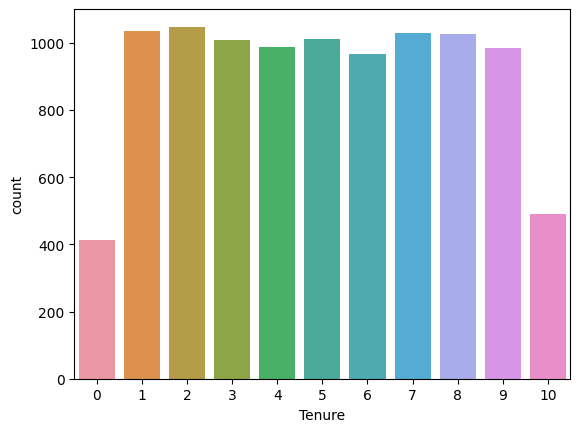

In [188]:
sns.countplot(df,x="Tenure")

<Axes: xlabel='Age', ylabel='Count'>

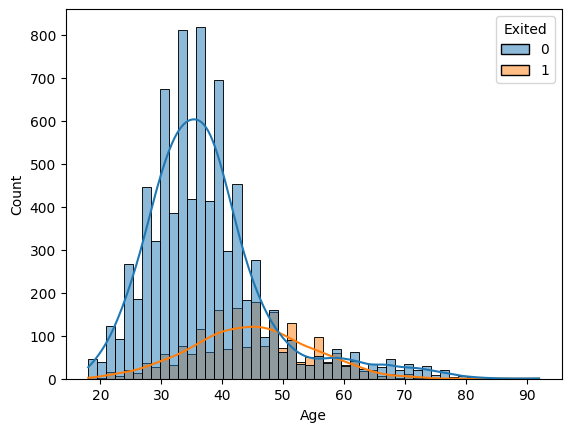

In [189]:
sns.histplot(df,x='Age',hue='Exited',kde=True,bins=50)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

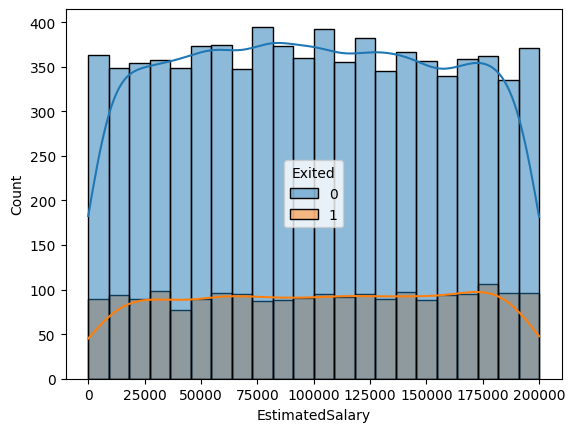

In [190]:
sns.histplot(df,x='EstimatedSalary',hue="Exited",kde=True)

In [191]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### ENCODING

In [192]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
lst=["Geography","Gender"]
for i in lst:
    df[i]=encoder.fit_transform(df[i])

In [193]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [194]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [195]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


#### BALANCING THE DATASET

In [196]:
from imblearn.over_sampling import SMOTE
target_column='Exited'

x=df.drop(target_column,axis=1)
y=df[target_column]


In [197]:
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(x,y)

In [198]:
df1=pd.concat([x_resampled,y_resampled],axis=1)

<Axes: xlabel='Exited', ylabel='count'>

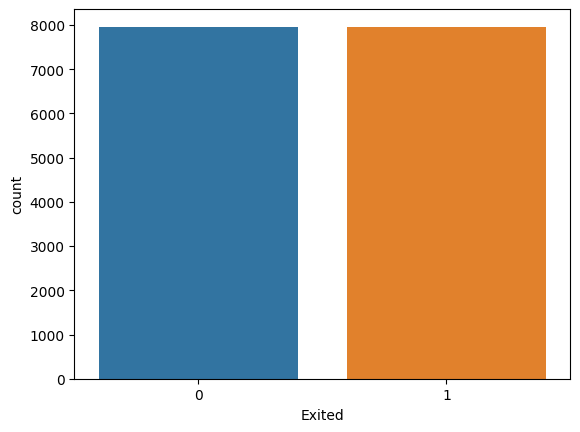

In [199]:
sns.countplot(data=df1,x='Exited')

In [200]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.000000,1,1,1,101348.880000,1
1,608,2,0,41,1,83807.860000,1,0,1,112542.580000,0
2,502,0,0,42,8,159660.800000,3,1,0,113931.570000,1
3,699,0,0,39,1,0.000000,2,0,0,93826.630000,0
4,850,2,0,43,2,125510.820000,1,1,1,79084.100000,0
...,...,...,...,...,...,...,...,...,...,...,...
15921,739,1,0,44,6,0.000000,1,1,0,163659.189083,1
15922,567,1,0,65,4,71252.914571,1,0,0,104540.014988,1
15923,668,1,0,40,3,0.000000,2,0,0,174884.787790,1
15924,667,0,1,42,7,187100.711220,1,0,0,32723.974522,1


#### FEATURE SELECTION

In [201]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [202]:
x=df1.drop('Exited',axis=1)
y=df1['Exited']

In [203]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
gb_model=GradientBoostingRegressor(n_estimators=100,random_state=42)

In [204]:
gb_model.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [205]:
feature_importances=gb_model.feature_importances_
feature_importance_df1=pd.DataFrame({'Feature':x_train.columns,"Importance":feature_importances})

In [143]:
feature_importances_df1=feature_importance_df1.sort_values(by='Importance',ascending=False)

In [144]:
print('RANKED FEATURES BY IMPORTANCES:')
print(feature_importances_df1)


RANKED FEATURES BY IMPORTANCES:
           Feature  Importance
3              Age    0.388402
6    NumOfProducts    0.316195
8   IsActiveMember    0.130619
5          Balance    0.063080
1        Geography    0.038696
9  EstimatedSalary    0.023736
0      CreditScore    0.018727
2           Gender    0.014103
4           Tenure    0.005163
7        HasCrCard    0.001277


Text(0, 0.5, 'FEATURES')

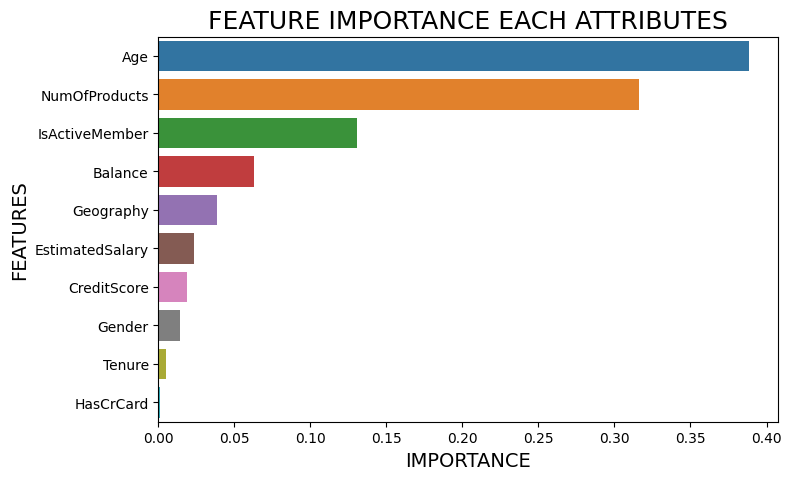

In [206]:
plt.figure(figsize=(8,5))
sns.barplot(data=feature_importances_df1,x='Importance',y='Feature')
plt.title("FEATURE IMPORTANCE EACH ATTRIBUTES",fontsize=18)
plt.xlabel("IMPORTANCE",fontsize=14)
plt.ylabel("FEATURES",fontsize=14)

In [207]:
df1=df1.drop(['HasCrCard','Tenure'],axis=1)

In [208]:
df1

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,0.000000,1,1,101348.880000,1
1,608,2,0,41,83807.860000,1,1,112542.580000,0
2,502,0,0,42,159660.800000,3,0,113931.570000,1
3,699,0,0,39,0.000000,2,0,93826.630000,0
4,850,2,0,43,125510.820000,1,1,79084.100000,0
...,...,...,...,...,...,...,...,...,...
15921,739,1,0,44,0.000000,1,0,163659.189083,1
15922,567,1,0,65,71252.914571,1,0,104540.014988,1
15923,668,1,0,40,0.000000,2,0,174884.787790,1
15924,667,0,1,42,187100.711220,1,0,32723.974522,1


In [209]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values

In [210]:
x

array([[6.19000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.01348880e+05],
       [6.08000000e+02, 2.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.12542580e+05],
       [5.02000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        3.00000000e+00, 0.00000000e+00, 1.13931570e+05],
       ...,
       [6.68000000e+02, 1.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 0.00000000e+00, 1.74884788e+05],
       [6.67000000e+02, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 3.27239745e+04],
       [6.04000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.92006242e+05]])

In [211]:
y

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [212]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [213]:
x_train

array([[6.27000000e+02, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 9.31326100e+04],
       [7.26000000e+02, 2.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.95192400e+05],
       [6.32000000e+02, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.33953851e+05],
       ...,
       [6.67000000e+02, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 9.75080400e+04],
       [6.63000000e+02, 1.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 0.00000000e+00, 1.51475251e+05],
       [6.97000000e+02, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 5.35811400e+04]])

In [214]:
x_test

array([[5.35000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 1.00000000e+00, 5.27095500e+04],
       [6.06000000e+02, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.56476360e+05],
       [6.80000000e+02, 2.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 1.00000000e+00, 1.01139300e+05],
       ...,
       [6.80000000e+02, 0.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 0.00000000e+00, 6.12408700e+04],
       [5.93000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 5.48319005e+04],
       [6.48000000e+02, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.86438860e+05]])

In [215]:
y_train

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [216]:
y_test

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [217]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train+scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [218]:
x_train

array([[6.27000000e+02, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 9.31326100e+04],
       [7.26000000e+02, 2.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.95192400e+05],
       [6.32000000e+02, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.33953851e+05],
       ...,
       [6.67000000e+02, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 9.75080400e+04],
       [6.63000000e+02, 1.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 0.00000000e+00, 1.51475251e+05],
       [6.97000000e+02, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 5.35811400e+04]])

In [219]:
x_test

array([[-1.22525396, -0.89553179, -0.84194407, ...,  1.0002694 ,
         1.29837534, -0.81028483],
       [-0.45049222,  0.43165521, -0.84194407, ..., -0.73702147,
        -0.77019331,  0.99098012],
       [ 0.35700594,  1.7588422 , -0.84194407, ...,  1.0002694 ,
         1.29837534,  0.03039642],
       ...,
       [ 0.35700594, -0.89553179,  1.18772735, ...,  1.0002694 ,
        -0.77019331, -0.66219155],
       [-0.59235   , -0.89553179, -0.84194407, ..., -0.73702147,
         1.29837534, -0.77344342],
       [ 0.00781755,  0.43165521, -0.84194407, ..., -0.73702147,
        -0.77019331,  1.51109249]])

# MODEL 1 : LOGISTIC REGRESSION

In [220]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [221]:
y_pred1

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

0.7128505650899958
[[1808  618]
 [ 754 1598]]


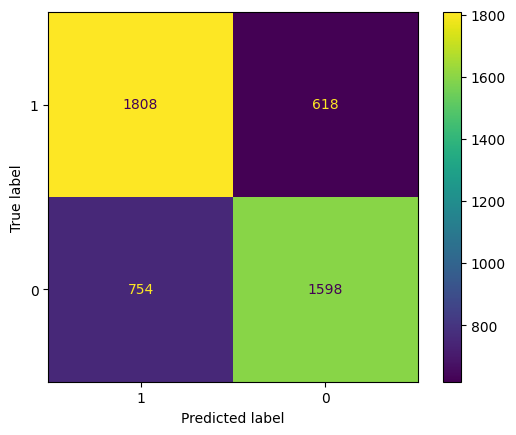

In [222]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
labels=[1,0]
matrix=confusion_matrix(y_test,y_pred1)
score=accuracy_score(y_test,y_pred1)
cmd=ConfusionMatrixDisplay(matrix,display_labels=labels)
print(score)
print(matrix)
cmd.plot()

In [223]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred1)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.75      0.72      2426
           1       0.72      0.68      0.70      2352

    accuracy                           0.71      4778
   macro avg       0.71      0.71      0.71      4778
weighted avg       0.71      0.71      0.71      4778



# MODEL 2: RANDOM FOREST

In [224]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)

In [225]:
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

0.5104646295521138
[[2424    2]
 [2337   15]]


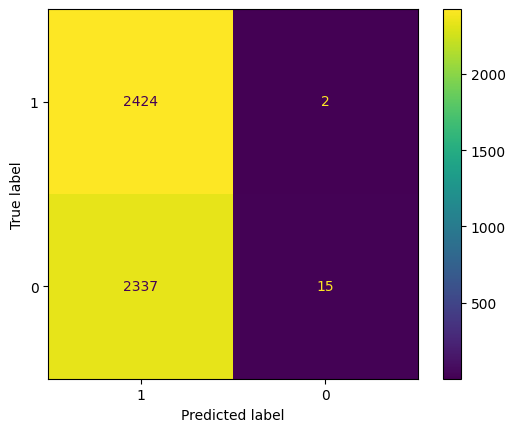

In [226]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
labels=[1,0]
score=accuracy_score(y_test,y_pred2)
matrix=confusion_matrix(y_test,y_pred2)
cmd=ConfusionMatrixDisplay(matrix,display_labels=labels)
print(score)
print(matrix)
cmd.plot()

In [227]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred2)
print(report)

              precision    recall  f1-score   support

           0       0.51      1.00      0.67      2426
           1       0.88      0.01      0.01      2352

    accuracy                           0.51      4778
   macro avg       0.70      0.50      0.34      4778
weighted avg       0.69      0.51      0.35      4778



# MODEL 3: XG Boost

In [228]:
from xgboost import XGBClassifier
model3=XGBClassifier()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)



In [229]:
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

0.5079531184596066
[[2426    0]
 [2351    1]]


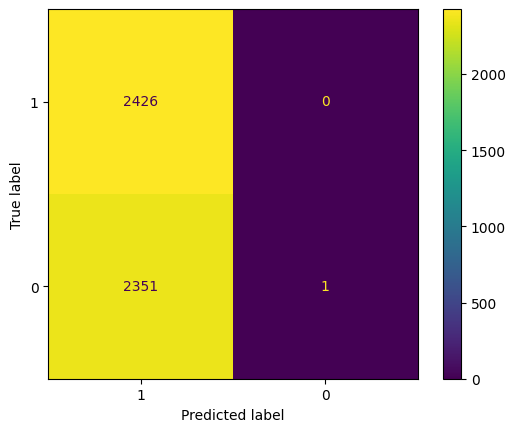

In [230]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
labels=[1,0]
score=accuracy_score(y_test,y_pred3)
matrix=confusion_matrix(y_test,y_pred3)
cmd=ConfusionMatrixDisplay(matrix,display_labels=labels)
print(score)
print(matrix)
cmd.plot()

In [231]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred2)
print(report)

              precision    recall  f1-score   support

           0       0.51      1.00      0.67      2426
           1       0.88      0.01      0.01      2352

    accuracy                           0.51      4778
   macro avg       0.70      0.50      0.34      4778
weighted avg       0.69      0.51      0.35      4778

